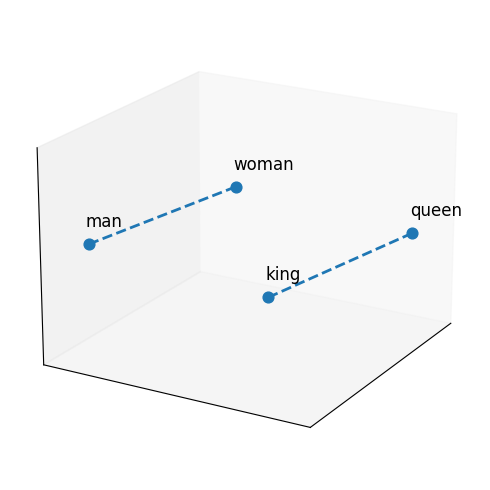

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

# Define mock word vectors
vectors = {
    'king':   np.array([0.8, 0.65, 0.0]),
    'man':    np.array([0.6, 0.6, 0.0]),
    'woman':  np.array([0.6, 0.2, 0.0]),
    'queen':  np.array([0.8, 0.25, 0.0]),
}

words = list(vectors.keys())
X = np.array([vectors[word] for word in words])
pca = PCA(n_components=3)
X_reduced = pca.fit_transform(X)

# 3D plot
fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111, projection='3d')

# Define colors
colors = {
    'king': '#1f77b4',
    'man': '#1f77b4',
    'woman': '#1f77b4',
    'queen': '#1f77b4',
}

# Offset values for label placement
offset = np.array([0.01, 0.00, 0.01])

# Plot points and offset labels
for i, word in enumerate(words):
    ax.scatter(*X_reduced[i], color=colors[word], s=60)
    ax.text(*(X_reduced[i] + offset), word, fontsize=12)

# Draw analogy arrows
def draw_arrow(start_idx, end_idx, color):
    ax.plot(
        [X_reduced[start_idx][0], X_reduced[end_idx][0]],
        [X_reduced[start_idx][1], X_reduced[end_idx][1]],
        [X_reduced[start_idx][2], X_reduced[end_idx][2]],
        linestyle='dashed',
        color=color,
        linewidth=2
    )

draw_arrow(0, 3, '#1f77b4')  # king → queen
draw_arrow(1, 2, '#1f77b4')  # man → woman

# Clean up plot appearance
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_zlabel('')
ax.view_init(elev=20, azim=30)
ax.grid(False)

plt.tight_layout()
plt.savefig("embedding_analogy_offset_labels.png", dpi=300, bbox_inches='tight')
plt.show()
